<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_2/yYGiBqtirSM.jpg" height="300" width="300"> 

# <center> R для тервера и матстата. <br>  <br> Домашка номер два! </center>

Данный ноутбук является домашкой по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2017-2018). Автор ноутбука [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/R_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

----------------------

Приветствую вас внутри второй домашки. По-прежнему, моими героями являетесь вы. Люблю вас. Всем лафки-плюшки. __Краткий брифинг:__

* В тетрадке $7$ задачек. Часть из них решается в пару строк кода, часть потребует написать один цикл. Не надо только пугаться циклов. Это циклы должны пугаться вас. решите любые 3 задачки на свой выбор. Самые интересные находятся внизу.  
* Снова некоторые задачи можно решать вручную. Если хочется, можно попробовать. Все решения опубликую после дедлайна.
* Дедлайн: следующая среда (2 мая), утро. 
* Следующая пара снова начнётся с разбора домашки.

Ближе к делу. С чего начинается любой скрипт? Правильно! С подгрузки пакетов :) 

In [1]:
library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

# Внимание! Если вы делаете дз в Rstudio, то вам не нужны пакеты grid, repr и т.п.

### Задачка 1 

Сгенерируйте выборку для случайной величины, которая обладает следующей функцией распределения:


$$
F(x) = \begin{cases} 0, x \le 0 \\ \sin(x), x \in (0, \pi/2] \\ 1, x>\pi/2 \end{cases}
$$

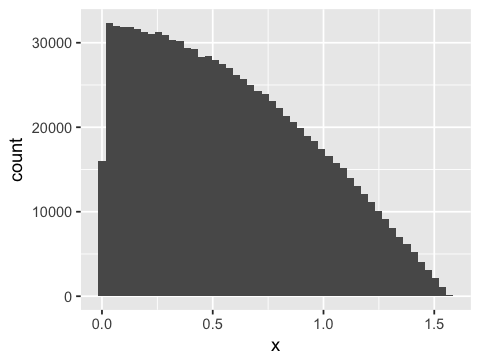

In [2]:
y = runif(10^6)
x = asin(y)
qplot(x, bins=50)

### Задачка 2

Помните? Мы всё это изучаем, чтобы решать реальные проблемы! С помощью генераций в R мы можем оценить любое математическое ожидание и любые вероятности. Нам позволяет сделать это великий и могучий фундаментальный ЗБЧ!

Давайте попробуем проверить несколько свойств математических ожиданий и дисперсий, которые вы доказали на лекциях по теории вероятностей в прошлом семестре. Выберите конкретные случайные величины (любые) и проверьте для них утверждения, перечисленные ниже. 

a) Верно ли, что $E(X + Y) = E(X) + E(Y)$? 

b) Верно ли, что $E(X \cdot Y) = E(X) \cdot E(Y)$?

c) Верно ли, что $Var(X + Y) = Var(X) + Var(Y) + 2 \cdot Cov(X,Y)$? 

d) Верно ли, что $Var(X \cdot Y) = Var(X) \cdot Var(Y)$? 

e) Верно ли, что если $Cov(X, Y) = 0$, то две случайные величины независимы? Удастся ли проверить это с помощью генераций? 

In [3]:
# Хочу экспоненциальную и равномерную, нанизанную на экспоненциальную!
# Так зависимсоть между величинами будет

n_obs = 10^6

x = rexp(n_obs, rate = 2)
y = x + runif(n_obs, min = 2, max = 5)

In [4]:
# a) Из курс тервера мы знаем, что это правда всегда 
mean(x + y)
mean(x) + mean(y)

[1] 4.496836

[1] 4.496836

In [5]:
# b) Ну тут явно чего-то не хватает...
mean(x*y)
mean(x)*mean(y)

[1] 2.243024

[1] 1.993413

In [6]:
# Давайте посмотрим лекции по терверу и вспомним чего не хватает :) 
mean(x)*mean(y) + cov(x,y)

[1] 2.243024

In [7]:
#c) Это чистая правда! В лекциях даже доказательство есть!
var(x + y)
var(x) + var(y) + 2*cov(x,y)

[1] 1.748905

[1] 1.748905

In [8]:
#d) Ложь! Очередная! А слабо найти правильную формулу? Она довольно неочевидна :)
var(x*y)
var(x)*var(y)

[1] 8.193048

[1] 0.2496848

e) Это наглая ложь! Простейший пример. Пусть случайная величина $X$ равновероятно принимает три значения:

|$X$|$-1$|$0$|$1$| 
|---|----|---|---|
|   |1/3 |1/3|1/3|

Пусть $Z = |X|$.

|$Z$|$0$|$1$| 
|---|---|---|
|   |1/3|2/3|

Тогда эти две виличины явно зависимы. Одна выражается через другую. Но при этом 

$$
Cov(X,Z) = E(X \cdot Z) - E(X) \cdot E(Z) = 0.
$$

In [9]:
x = sample(c(-1,0,1), size = n_obs, replace = TRUE)
z = abs(x)  # задаём зависимость между z и x  
cov(x,z)    # получаем близкое к нулю число

[1] -0.0003977684

### Задачка 3 

Помните распределение пуассона, экспоненциальное, равномерное и геометрическое? Помните какие там в теории должны быть у этих распределений математические ожидания и дисперсии? А сможете показать с помощью симуляций, что их выборочные дисперсия и среднее сходятся при $n \to \infty$ к теоретическим? Сделайте это для одного из распределений на свой выбор. 

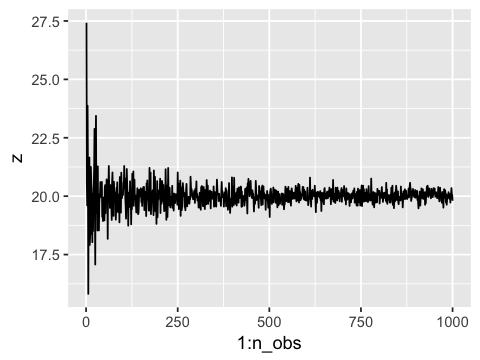

In [10]:
# хочу Хи-квадрат с 20 степенями свободы! 
# для такого распределения математическое ожидание равно числу степеней свободы
# дисперсия равна двойке умножить на число степеней свободы

n_obs = 10^3
z = rep(0, n_obs)  # вектор для средних
for(i in 1:n_obs){
    z[i] = mean(rchisq(i, df = 20))
}

qplot(1:n_obs, z, geom='line')

Warning message:
“Removed 1 rows containing missing values (geom_path).”

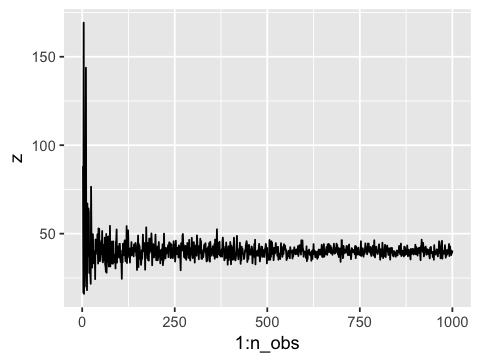

In [11]:
n_obs = 10^3
z = rep(0, n_obs)  # вектор для дисперсий
for(i in 1:n_obs){
    z[i] = var(rchisq(i, df = 20))
}

qplot(1:n_obs, z, geom='line')

# Ура! На картинках есть сходимость. Крутяк!

Второй раз в течение тетрадки я пишу "А помните?". Это достойно следующей картинки!

![](https://res.cloudinary.com/teepublic/image/private/s--7w8iwo9Z--/t_Preview/b_rgb:191919,c_lpad,f_jpg,h_630,q_90,w_1200/v1482178539/production/designs/968854_1.jpg)

### Задачка 4 (Распределение Коши) 

Распределение Коши тот ещё фрукт. У стандартного распределения Коши следующая плотность: 

$$
f_X(x) = \frac{1}{\pi(1+x^2)}
$$

Выглядит довольно красиво, но эта красота обманчива. У распределения Коши есть куча проблем. Одна из таких проблем это отсутствие математического ожидания и дисперсии. Закон больших чисел позволяет нам сказать, что для некоторых распределений 

$$ P( \mid \bar x - E(X)\mid \le \varepsilon  ) \to 1, $$

то есть выборочное среднее по вероятности сходится к математическому ожиданию. Как мы знаем, для распределения Коши математического ожидания не существует. Интересно было бы узнать к чему в таком случае сходится выборочное среднее. Для решения вам понадобится функция `rcauchy`.

a) Постройте для распределения Коши точно такую же картинку, какую мы строили на паре для подбрасывания игральной кости. Попытайтесь проинтерпретировать то, что вы увидете. Если не получается, не печальтесь. Когда я печалюсь, я обычно перестаю печалиться и просто становлюсь клёвым. И это правда. Советую вам делать также. 

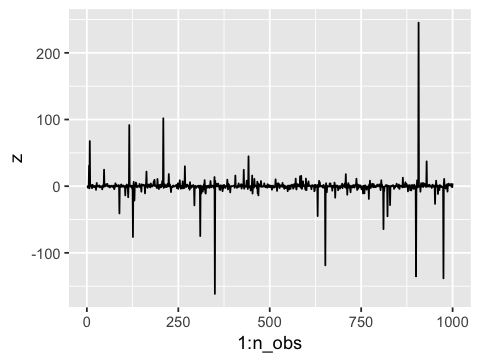

In [12]:
# Чудо, а не задание! Копипаста кода и замена распределения на Коши :) 

n_obs = 10^3
z = rep(0, n_obs)  # вектор для средних

for(i in 1:n_obs){
    z[i] = mean(rcauchy(i))
}

qplot(1:n_obs, z, geom='line')

b) Попробуйте точно также посмотреть к чему сходится выборочная дисперсия. 

Warning message:
“Removed 1 rows containing missing values (geom_path).”

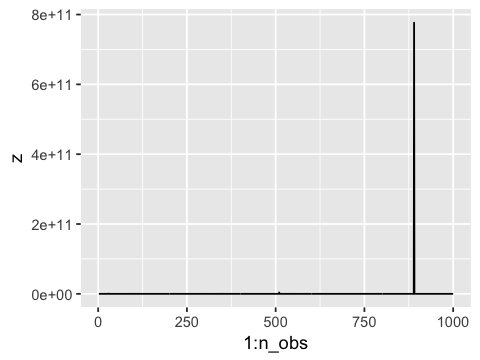

In [13]:
# И ещё одна копипаста кода 
n_obs = 10^3
z = rep(0, n_obs)  # вектор для выборочных дисперсий

for(i in 1:n_obs){
    z[i] = var(rcauchy(i))
}

qplot(1:n_obs, z, geom='line')

У распределения Коши тоже есть разные забавные свойства. Например, если у нас есть две независимые нормально распределённые случайные виличины $X_1 \sim N(0,1)$ и $X_2 \sim N(0,1)$, то случайная величина $Y = \dfrac{X_1}{X_2}$ будет иметь распределение Коши. Если вы хорошо учите математическую статистку, то вы уже догадались, что распределение Стьюдента с одной степенью свободы, $t(1)$ — это ни что иное как распределение Коши. Посмотрите в лекциях чему равно математическое ожидание и дисперсия для распределеняи Стьюдента и попытайтесь соотнести это с тем, что было получено вами выше.

На следующей паре мы будем более подробно говорить про разные сходимости (по вероятности, почти наверное, слабая и тп), а также про распределение Стьюдента. Как бы таинственно это для вас не прозвучало, но оно обладает тяжёлыми хвостами. Поднимем таинсвенность на новый уровень: тяжёлые хвосты способствуют порождению чёрных лебедей. В финансах это вызывает большой скоп проблем. Попробуем успеть поговорить и про это. 

### Задачка 5 (Миша - страховщик)

У Миши проблемы с бизнесом. Торговля газетами приносит денег, но не в тех объёмах, в которых хотелось бы. Плюс ещё этот долбанный аналитик написал в R один цикл и теперь просит кучу денег за свою <<работу>>. Миша хотел бы перейти на новый уровень. Недавно он читал [учебник по финансам нового поколения](https://www.ozon.ru/context/detail/id/141895538/), и его очень сильно заинтересовала глава про страховки. Жилка комерса нашептала Мише, что нужно выходить на новый уровень.

Миша решил начать страховать всех этих бездарей, которые продают газеты. На районе работает $20$ киосков (в простонародье ларьков), продающих газеты. Количество потенциальных покупателей - случайная величина с распределением Пуассона. Cреднее значение случайной величины равно $50$. Это значение было получено эмпирическим путём. Все фирмы пытаются максимизировать свою прибыль, а значит покупают число газет равное среднему значению покупателей. Газеты покупаются по $15$ рублей, а продаются по $30$.

Миша строит свой страховой бизнес следующим образом. Киоск платит Мише страховой взнос в размере $z$ рублей каждый день. Если в этот день киоск закупает большее число газет, чем продаёт, Миша должен выплатить фирме себестоимость этих газет. __Например:__ киоск закупил 50 газет, заплатил Мише за страховку $z$ рублей, продал в течение дня только $48$ газет. Оставшиеся две газеты Миша выкупает у киоска за $2 \cdot 15$ рублей. 

a) Помигите Мише сварганить новый бизнес и ещё раз проконсультируйте его по теории вероятностей. Пусть Миша устанавливает для всех фирм единый страховой взнос. Какой должна быть минимальная величина этого взноса? 

b) Не хотели бы вы тоже бросить учёбу и уйти в бизнес вместе с Мишей? 

__Решение:__ 

Рассмотрим только один киоск. Если для него $X \ge 50$, Миша получает $z$ рублей. Если $X = k < 50$, он получает $z - 15 \cdot (50 - k)$ рублей. Ожидаемая прибыль Миши равна 

$$
 P(X \ge 50) \cdot z + \sum_{k=0}^{49} P(X = k) \cdot (z - 15 \cdot (50 - k))
$$

Нужно приравнять её к нулю и найти минимальную возможную ставку $z$. Если решить это уравнение руками или в вольфраме, получится $z=42.24$. Давайте сделаем это с помощью симуляций. 

In [28]:
simulation <- function(n_obs, z){

    x = rpois(n_obs, lambda = 50)

    profit = sum(x > 50)/n_obs * z
    for(k in 0:49){
        profit = profit + sum(x == k)/n_obs *(z - 15*(50-k))
    }

    return(profit)
}

Сделаем парочку пристрелочных выстрелов, чтобы понять в каких диапазонах перебирать $z$. Если бы мы не знали, что $z=43$, мы бы поступили именно так. 

In [34]:
simulation(1000,40)

simulation(1000,45)

[1] -5.15

[1] 2.565

Определились! 

In [37]:
prof = rep(0,5)

for(z in 40:45){
    prof[z-39] = simulation(10^6, z)
}

prof

[1] -4.437395 -3.663672 -2.645841 -1.611325 -0.763591  0.188850

Ну что-то похожее на правду. Нужно только симуляций побольше. Когда я придумывал задачку, я не знал ответа. Также я не знал какая именно информация из условия понадобится для решения. Итак, Миша начал выходить в плюс в районе $z = 43$. Обратите внимание, что на рынке есть всего 20 фирм. При таком маленьком $n$ вероятность отклониться от среднего значения довольно высока. 

### Задачка 6 (Парадокс дней рождений)

Вы когда-нибудь слышали про парадокс дней рождений? На википедии есть статья. Остановитесь, не нужно её гуглить. Давайте попробуем поразмышлять. Как думаете какова вероятность того, что в комнате, в которой находится $23$ человека, хотябы у двоих из них дни рождения совпадают (не у вас с кем-нибудь совпадёт, а у двоих произвольных людей)? 

__Внимание, ответ:__ вероятность этого $0.5$. Если в комнате $50$ человек, то вероятность этого возрастает до $0.97$. Получается, что если вы находитесь в большой аудитории, то вы смело можете ставить деньги на то, что в ней дни рождения у каких-нибудь двух произвольных людей совпадут. Делая такие ставки довольно часто, вы сможете обогатиться. Конечно же, иногда вы будете проигрывать, но математическое ожидание такой игры будет суперположительным. Например, если вы будете ставить $1000$ рублей, ваш ожидаемый выигрыш составит

$$
E(X) = 0.97\cdot1000 - 0.03\cdot1000.
$$ 

Слабо найти вероятность того, что хотябы у двоих людей из $n$ дни рождения совпадут руками? Если слабо, добро пожаловать на [википедию.](https://ru.wikipedia.org/wiki/Парадокс_дней_рождения)

Почему нам трудно в это поверить? Ответ математический: степени трудно осознать. Как визирь в [древней задаче про шахматы и зёрнышки,](https://ru.wikipedia.org/wiki/Задача_о_зёрнах_на_шахматной_доске) мы плохо понимаем степенную функцию. Даже если мы подучились математике и статистике, это всё равно как-то непривычно. Вот пример неправильной логики: какова вероятность выпадения $10$ решек подряд?

Нетренированный мозг может составить примерно такую цепочку мыслей: одна решка - $50%$, две решки - $25%$. Значит десяток решек в $10$ раз труднее, ну то есть $5%$. Ну вот мы и облажались. Реальный шанс это $0.5^{10}$. Ошиблись немного. Примерно в $50$ раз.

Итак, в произвольной группе из $50$ человек вероятность того, что хотябы у двоих людей дни рождения совпадут равна $0.97$. Но это всё только в теории. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так. В связи с этим реальная вероятность может отличаться от теоретической. 

В этой задачке вам предстоит проверить парадокс дней рождений на эмпирических данных. В табличке `vk_bdates.csv` лежит информация о $4589300$ пользователей из вконтакте. В табличке можно найти данные о имени пользователя `first_name`, его поле `sex`, его родном городе `home_town`, городе проживания `city`, дне `bdate`, месяце `bmonth` и годе `byear` рождения. Также там лежит информация о том удалена ли его страничка `deactivated`. 

Попробуйте на основе данных из этой таблички проверить парадокс дней рождений. Проверять его мы будем, конечно же в R. От вас требуется: 

1. Удалить из таблички всех людей, чьи страницы были забанены или удалены.
2. Удалить из таблички всех людей, для которых недоступны день и месяц рождения.
3. Постройте гистограмму, на которой было бы понятно в какой месяц родилось какое количество людей. Команда для этого приведена ниже. Как считате помесячная рождаемость имеет равномерное распределение?
4. Постройте точно такую же гистограмму для дней рождений. Вас ждёт небольшой сюрприз. Избавьтесь от этого сюрприза, чтобы он не замусоривал данные. Как считатет, подневная рождаемость имеет равномерное распределение? 
5. Постройте заключительную гистограмму для сочетания колонок `bmonth` и `bday`, чтобы понять как дни рождения распределны в течение года. 
6. Предпоследнее! Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдётся хотя бы двое с одинаковым днём рождения. Для этого напишите цикл, в ходе которого из таблички с помощью команды `sample` будет делаться подвыборка из 50 строк. Для этих 50 строк внутри условия вы должны проверить совпадение дней рождений. Если совпало, то нужно запомнить это в переменную счётчик, которую вы впоследствии, чтобы получить вероятность, поделите на длину цикла. 
7. Попробуйте проделать ту же оценку отдельно для подмножества женщин и подмножества мужчин. Насколько оценки вероятностей разнятся? 

In [ ]:
df = read.csv('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data/vk_bdates.csv', sep='\t', dec='.')

dim(df)   # размер таблицы
head(df,10)  # её шапочка 

Попробуем порешать всё это при участии пакета для работы с таблицами `dplyr`. При желании можно сделать всё это и без него.

In [ ]:
# если пакет не установлен, установите его!
library('dplyr')

options(repr.plot.width=8, repr.plot.height=3) # размер картинок

In [ ]:
# Посмотрим какие у нас в колонке deactivated бывают значения. 
# Можно сделать это напрямую
# команда select вытащила столбец из таблицы, distinct оставила уникальные значения
distinct(select(df, deactivated))

In [ ]:
# А можно сделать это через трубочку, которая будет последовательно применять 
# команды к тому, что слева было получено на выходе :)

df %>% select(deactivated) %>% distinct()

In [ ]:
# Посмотрим сколько у нас в таблице заблоченых и удалённых людей
# cat это модный print

cat('Были забанены:', sum(df$deactivated == 'banned'),'\n')
cat('Удалили свои страницы:', sum(df$deactivated == 'deleted'))

In [ ]:
# 1. Чистим таблицу от удалённых и забаненых 

df_clean = df %>% filter(deactivated != 'banned', deactivated != 'deleted')
head(df_clean)

In [ ]:
# Срез df_clean = df[(df$deactivated != 'banned')&(df$deactivated != 'deleted'),]
# дал бы на выход то же самое, но он бы отработал медленнее деплировской фильтрации.
# Ниже все срезы мы будем делать командой filter().

In [ ]:
# 2. Дропаем NA по дням и месяцам
df_dropna = df_clean %>% filter(!is.na(bday),!is.na(bmonth))

dim(df_dropna)  # число строк довольно сильно упало :(
head(df_dropna)

In [ ]:
# 3. Гистограмма с рождаемостью по месяцам 
ggplot(df_dropna, aes(x=factor(bmonth)))+
    geom_bar(stat="count", width=0.7, fill="steelblue") + 
    xlab('Month') + ylab('Count')

Такс такс такс, что тут у нас. Учитывая, что выборка довольно большого объёма, сложно списать разницу в высоте столбиков на случайность. Если мы будем проверять гипотезу о равномерности распределения, скорее всего, она будет отвергаться. Почему-то в конце года рождается меньше людей. 

In [ ]:
# 4. Аналогичная картинка для дней 
ggplot(df_dropna, aes(x=factor(bday)))+
    geom_bar(stat="count", width=0.7, fill="steelblue") + 
    xlab('Days') + ylab('Count')

In [ ]:
# Что за?! 
df_dropna %>% select(bday) %>% distinct() %>% tail()

Сюрприз! Вконтакте есть приколисты. Служба поддержки отвечат, что в давнем времени была возможность обходить валидацию и писать некорректные данные в некоторые поля. Придётся нам отфильтровать это. 

In [ ]:
df_dropna = df_dropna %>% filter(bday >=0, bday <=31)

ggplot(df_dropna, aes(x=factor(bday)))+
    geom_bar(stat="count", width=0.7, fill="steelblue") + 
    xlab('Days') + ylab('Count')

Снова равномерное распределение не особо наблюдается. Почему-то дети любят рождаться в самом начале месяца. 

In [ ]:
# 5. Заключительная гистограмма. Для её построения нам придётся изучить команду mutate, которая
# изменяет внутренности таблицы 

# install.packages("lubridate")  # Чтобы всё было совсем красиво, установим пакет для работы с датами
# Подробнее: https://rpubs.com/davoodastaraky/lubridate
# можно было бы сделать это и без пакета, оставив в виде '3-10', но тогда бы на гистограмме не было бы 
# автоматической красивой сортировки

library("lubridate")

# подписали рандомный год, чтобы не париться
df_dropna = df_dropna %>% mutate(bdate = mdy(paste(bmonth,bday,'2000',sep = '-'))) 
head(df_dropna)

In [ ]:
options(repr.plot.width=5, repr.plot.height=40) # размер картинки

ggplot(df_dropna, aes(x=factor(bdate)))+
    geom_bar(stat="count", width=0.7, fill="steelblue") + 
    coord_flip()  # команда перевернет оси

Означает ли это, что люди любят рождаться 1 января? Вовсе нет. Давайте вспомним откуда мы взяли данные. Из контакта. Такой выброс на 1 января сомнителен. Скорее всего он происходит из-за наличия приколистов.  Также на картинке есть 29 февраля. В него рождается примерно в 4 раза меньше людей, чем в остальные месяцы. Очень мило, что мы можем увидеть это на гистограмме. 

In [ ]:
# 6. Посмотрим какой будет реальная вероятность того, что у двух произвольных людей из 50 др совпадут.

# sample_n  выбрала рандомные 50 строк 
# после мы выбрали колонку с датами
# в колонке с датами оставили уникальные значения
# подсчитали их количество 
# если уникальных значений меньше 50, значит два др совпали 

df_dropna %>% sample_n(50) %>% select(bdate) %>% distinct() %>% nrow()

In [ ]:
# Засунем всё это в функцию 
prob_estimator <- function(df, n_ppl, n_obs){
    
    m = 0
    for(i in 1:n_obs){
        k = df %>% sample_n(n_ppl) %>% select(bdate) %>% distinct() %>% nrow()
        if(k != n_ppl){
            m = m + 1
        }
    }

    return(m/n_obs)
}

In [ ]:
# для 100 человек
prob_estimator(df_dropna, 100, 1000)

In [ ]:
# Посмотрим то же самое для 23 человек 
prob_estimator(df_dropna, 23, 1000)

Вроде бы всё более-менее согласуется с теорией и вероятности получаются похожими на неё, хоть и немного другими. Попробуем позапускать эксперимент на разном числе людей в группе. Оценки будем строить на основе $1000$ наблюдений. На основе запусков составим следущую забавную табличку: 


| Людей в группе |Теоретическая вероятность|Эмпирическая вероятность|
|----------------|-------------------------|------------------------|
|10              |0.12                     | 0.13                   |
|20              |0.41                     | 0.45                   |
|30              |0.70                     | 0.71                   |
|50              |0.97                     | 0.98                   |
|100             |0.99                     | 1                      |

Поосторожнее с идеей проверить правильной ли получилась табличка. Код для оценивания всех вероятностей в ней работает довольно долго. 

В конечном счёте наши оценки довольно похожи на цифры, полученные в теории. Парадокс дней рождений разрешён в нашу пользу. На самом деле неплохо было бы построить для каждой из долей доверительный интервалы и чисто формально проверить гипотезу о том, что каждая из долей совпадает с теоретической, но это мы оставим до будущих занятий. 

In [ ]:
# 7. Посмотрим различаются ли вероятности для женщин и мужчин

df_male = df_dropna %>% filter(sex == 2)
df_female = df_dropna %>% filter(sex == 1)

prob_estimator(df_male,   50, 1000)
prob_estimator(df_female, 50, 1000)

In [ ]:
prob_estimator(df_male,   23, 1000)
prob_estimator(df_female, 23, 1000)

Оценки разнятся не то чтобы особо сильно. Опять же, было бы неплохо проверить гипотезу о равенстве долей для мужчин и женщин. Но это тоже остаётся на будущее.

На самом деле мы с вами только что впервые попробовали вскрыть внутренности сундука, о котором мы говорили на прошлой паре, по итоговой выборке. Закон больших чисел в форме Бернулли (помните из лекций по терверу?) позволил нам оценить вероятность события на основе его частоты. Очень круто, когда математика разрешает тебе сделать что-нибудь клёвое. 

### Задачка 7 (Киллер) 

Почти все пункты данной задачи можно попытаться решить руками. Это вполне себе реально.

Эконом играет в киллера! Всего участие в игре принимает $100$ человек. Краткие правила игры: 

1. Каждый игрок одновременно и убийца и жертва. 
2. Игроку даётся конверт, в котором лежит имя человека, которого он должен убить. 
3. Сам игрок также находится у кого-то в конверте. Нужно не допустить своей смерти. 
4. Чтобы убить другого игрока, надо оказаться с ним наедине и застрелить из пальца. 
5. Жертва убитого становится новой жертвой игрока. 
6. Побеждает тот, кто совершит наибольшее число убийств. 

Организаторы игры сразу же столкнулись с несколькими проблемами. Первая проблема это __суицидники.__ Если Максиму в конверте попался Максим, то Максим должен убить сам себя. Он - суицидник.  В такой ситуации организаторам придётся поменять конверт. Хотелось бы, чтобы подобных ситуаций было как можно меньше.

a) Оцените с помощью симуляций вероятность того, что хотя бы один человек получит в конверте сам себя. Какова вероятность того, что суицидником окажется именно Максим? 

In [39]:
# Зафиксируем людей. Раздаём конверты. 
n = 100
konv = sample(1:n) # если номер письма совпадает с порядковым номером в векторе, человек получил самого себя. 
konv

[1]   7  42  25  32  49   8  85  36  77  96  21  60  28  69  35  48  86  33
 [19]  80  72  74  12  50  14 100  20  18  17  64   4  58  43  24  73   9  83
 [37]  66  19  44   5  82  65  37  10  31  67  97  47  61  84  68  13  57  78
 [55]  89  99  76  75  56  98   3  53  79  27  87  23  95  30  54  94   2  92
 [73]  46  45  15  93  88  11  34  40   1  81  16  52  91  51  26  29  71  62
 [91]  41   6  59  70  38  63  55  90  39  22

In [40]:
konv == 1:n  # если хотя бы один человек у себя в конверте, увидим в векторе TRUE

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE

In [41]:
sum(konv == 1:n) # получаем число суицидников

[1] 0

In [42]:
# А теперь всё вместе! 
n_obs = 10^6  # устроим миллион раздач! 
n = 100       # число игроков

x = rep(0, n_obs)  # сюда будем заносить число суицидников
for(i in 1:n_obs){
    konv = sample(1:n)      # раздача конвертов 
    x[i] = sum(konv == 1:n) # число суицидников в раздаче 
}

sum(x > 0)/n_obs  # вероятность хотя бы одного суицида 

[1] 0.632157

$$
P(\text{Максим суицидник}) = \frac{(n-1)!}{n!} = \frac{1}{n} = 0.01
$$

b) Пусть случайная величина $X$ - количество суицидников. Оцените $E(X)$ с помощью симуляций. Проинтерпретируйте величину $E(X)$. Что она означает для организаторов игры? 

In [43]:
mean(x) # среднее число суицидников

[1] 0.999197

Вторая проблема это __мэтчинги__. Если у Глеба в конверте оказалась Аня, а у Ани в конверте оказался Глеб, то между ними возник мэтчинг. Когда игроки останутся наедине, они попробуют убить друг-друга, и у них ничего не выйдет. Организатором придётся заменить Ане и Глебу конверты с жертвами. 

c) Оцените вероятность того, что в раздаче возник хотя бы один мэтчинг. Какова вероятность того, что мэтчинг возникнет именно между Аней и Глебом? 

In [44]:
# Мэтчинги это уже чуть более серьёзный разговор. На позиции i должно оказаться j, а на позиции j i

# Простой пример: [3,5,1,2,4]
# Между 3 и 1 игроком мэтчинг, так как x[1] = 3, а x[3] = 1
# это то же самое что и x[x[1]] = 1 или x[x[3]] = 3

z = c(3,5,1,2,4)
sum(z[z] == 1:5) # получается двойка
                 
z = c(3,2,1,5,4) # два мэтчинга и суицидник
sum(z[z] == 1:5) # нечётное число 

[1] 2

[1] 5

In [45]:
konv = sample(1:n)            # раздача конвертов
sum(konv[konv] == 1:n) %/% 2  # число мэтчингов

[1] 1

In [46]:
# А теперь всё вместе! 
n_obs = 10^6  # устроим миллион раздач! 
n = 100       # число игроков

x = rep(0, n_obs)  # сюда будем заносить число мэтчингов в раздаче

for(i in 1:n_obs){
    konv = sample(1:n)                   # раздача конвертов 
    x[i] = sum(konv[konv] == 1:n)  %/% 2 # число мэтчингов
}

sum(x > 0)/n_obs  # вероятность хотя бы одного мэтчинга

[1] 0.55364

d) Пусть случайная величина $Y$ - количество мэтчингов. Оцените $E(Y)$. Проинтерпретируйте величину $E(Y)$. Что она означает для организаторов?

In [47]:
# мэтчинги в разных играх
x[1:20]

[1] 4 0 1 0 0 2 1 1 1 2 1 1 1 1 0 1 0 1 2 0

In [48]:
mean(x)   # среднее число мэтчингов

[1] 0.783267

In [49]:
median(x) # медиана равна 1, в игре стоит ожидать хотябы один мэтчинг

[1] 1

$$
P(\text{мэтчинг у Ани и Глеба}) = \frac{(n-2)!}{n!} = \frac{1}{n \cdot (n-1)} = 0.0001
$$

e) Кроме мэтчингов в игре существуют __цепи.__  Например, у Ахмеда в конверте могла оказаться Рита, у Риты Максим, а у Максима Ахмед. Игроки выстраиваются в цепь. После того как Рита убьёт Максима, а затем Ахмеда, цепь замкнётся и у Риты окажется она же сама. Ответьте устно на вопрос: какова вероятность того, что в игре ни один игрок в ходе разрыва такой цепи не окажется сам у себя. 

__Ответ на устный вопрос:__ ни один игрок не окажется сам у себя только, если вся раздача - одна большая цепь. Вероятность этого $\frac{1}{n!}$.

Пусть случайная величина $Z$ - количество цепей в игре. Оцените $E(Z)$. Что эта величина означает для организаторов? Проинтерпретируйе её.  

In [84]:
# Можно было бы конечно написать огромную функцию с огромными циклами, но мы не будем
# Немного пораскинем мозгами и придумаем более простой алгоритм поиска цепей. 
# При решении прошлого пункта мы с вами начились искать пары делая z[z]

z = c(3,2,1)
z
z[z]  # Пары меняются местами => profit

[1] 3 2 1

[1] 1 2 3

In [85]:
# По аналогии можно искать и тройки
z = c(3,1,2)
z
x = z[z]
x
x[z]  # Но для поиска троек придется сделать z[z] два раза

[1] 3 1 2

[1] 2 3 1

[1] 1 2 3

In [86]:
# Соответственно z[z] три раза поможет нам найти четвёрки
z = c(4,1,2,3)
x = z[z]
z
x
y = x[z]
y
y[z]

[1] 4 1 2 3

[1] 3 4 1 2

[1] 2 3 4 1

[1] 1 2 3 4

In [88]:
# Кажется, что алгоритм готов! На самом деле не совсем. 
# Давайте посмотрим на случай из тройки и пары: 
z = c(4,5,2,1,3)
z
x = z[z] # При первой махинации пара встанет на свои места
x
y = x[z] # При второй махинации тройка встанет на свои места, а пара испортится
y
y[z]     # При третьей махинации тройка испотится, а пара встанет на места

[1] 4 5 2 1 3

[1] 1 3 5 4 2

[1] 4 2 3 1 5

[1] 1 5 2 4 3

In [95]:
# Проблема в том, что у перестановок разный цикл и когда одна из них входит 
# в норму, другая неизбежно портится. Но выход есть. Будем искуственно вмешиваться
# в работу перестановок и не давать двигаться тем позициям, которые уже оказались 
# на своих местах. 

z = c(4,5,2,1,3)
z
yp = z==1:5  # смотрим кто уже на своих местах
y = z[yp]  # запоминаем их 

x = z[z]   # При первой махинации пара встанет на свои места
x[yp] = y  # Выправляем то, что уже было на своих местах, но перемешалось
x

yp = x==1:5  # снова смотрим кто на своих местах
y = x[yp]  # запоминаем их 
x = x[z]   # на своих местах оказываются тройки, пара смешивается
x[yp] = y  # исправляем это
x

[1] 4 5 2 1 3

[1] 1 3 5 4 2

[1] 1 2 3 4 5

In [125]:
# Напишем функцию для одной перестановки 

permutation <- function(vect, z){
    yp = vect==1:length(vect)
    y = vect[yp]
    
    x = vect[z]
    x[yp] = y
    return(x) 
}

z = c(4,5,2,1,3)
x = permutation(z,z)
x
x = permutation(x,z)
x

[1] 1 3 5 4 2

[1] 1 2 3 4 5

In [204]:
# Отлично! Функция готова, остался цикл.
n = 100 
konv = sample(1:n)  

i_iter = 1                 # счётчик для итераций (цепи такого размера мы сейчас нашли)
i_chain = sum(konv == 1:n) # число цепей, суицидники - цепи длины 1
i_sum = sum(konv == 1:n)   # люди, которые на текущей итерации на своей позиции

x = konv  # Копируем раздачу, чтобы был вектор, который мы будем менять 

cat(' Число суицидников:', i_chain, '\n\n')
while(i_sum != n){ # цикл идёт пока все не встанут на свои места
    
    x = permutation(x,konv)  # сделали перестановку 
    i_iter = i_iter + 1      # плюс одна итерация
    
    # выяснили сколько цепей было обнаружено на данном шаге
    chain_count = (sum(x == 1:n) - i_sum) / i_iter 
    
    # увеличили счётчик цепей на число найденных цепей
    i_chain = i_chain + chain_count
    
    # увеличили сумму с людьми на своих же позициях
    i_sum = i_sum + (sum(x == 1:n) - i_sum) 
    if(chain_count > 0){
        cat(' Длина цепи:', i_iter, '\n', 'Число цепей:', chain_count, '\n\n')
    }
       
}

cat('Всего цепей в игре:',i_chain)

 Число суицидников: 1 

 Длина цепи: 5 
 Число цепей: 1 

 Длина цепи: 12 
 Число цепей: 1 

 Длина цепи: 30 
 Число цепей: 1 

 Длина цепи: 52 
 Число цепей: 1 

Всего цепей в игре: 5

In [ ]:
# Это было жёстко. Даже для меня. Попробуем позапускать код на малых выборках
# и посмотрим состыкуется ли. Вроде бы состыкуется. 

# Нам нужно узнать среднее число цепей в игре. Значит цикл по размотке придётся 
# запускать много-много раз. Давайте оформим его как функцию. 

In [211]:
one_chain <- function(konv){
    n = length(konv)
    
    i_iter = 1                 # счётчик для итераций (цепи такого размера мы сейчас нашли)
    i_chain = sum(konv == 1:n) # число цепей, суицидники - цепи длины 1
    i_sum = sum(konv == 1:n)   # люди, которые на текущей итерации на своей позиции

    x = konv  # Копируем раздачу, чтобы был вектор, который мы будем менять 

    while(i_sum != n){ # цикл идёт пока все не встанут на свои места

        x = permutation(x,konv)  # сделали перестановку 
        i_iter = i_iter + 1      # плюс одна итерация

        # выяснили сколько цепей было обнаружено на данном шаге
        chain_count = (sum(x == 1:n) - i_sum) / i_iter 

        # увеличили счётчик цепей на число найденных цепей
        i_chain = i_chain + chain_count

        # увеличили сумму с людьми на своих же позициях
        i_sum = i_sum + (sum(x == 1:n) - i_sum) 
    }
    
    return(i_chain)
}


In [216]:
n_obs = 10^5
s = rep(0,n_obs) # вектор для числа цепей

for(i in 1:n_obs){
    s[i] = one_chain(sample(1:n))   
}

In [217]:
s[1:10]

[1] 4 3 5 5 8 3 4 4 2 6

In [218]:
mean(s)  # вот и получили среднюю длину цепи

[1] 5.18833

f) Пусть случайная величина $Scriptonit$ - длина цепи, возникшей в игре. Оцените с помощью симуляций среднюю длину цепей, то есть $E(Scriptonit)$.

Эх! Организаторы столкнуться с довольно большим числом сложностей. На основе всего того анализа, который вы провели выше, дайте им пару советов: о чём стоит беспокоиться, а о чём нет. Также подумайте о том, что ещё следует проверить. 


Ясно, что полюбак будет один суицидник, ясно что полюбак будет один мэтчинг. Вот прям зуб даю. Значит стоит раздавать последние конвертов $5$ разом, чтобы в случае чего можно было бы их свапнуть. При этом, раздавая конверты, надо не забыть сохранить конфедициальность.